<img src='./images/main.png' width='800'><br>
<img src='./images/2nd.png' width='800'><br>
<img src='./images/3rd.png' width='800'>

In [183]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

#아 이거 맥에서 한글실행 코드인데.... 아래꺼 지우고 윈도우용으로 하면될듯 
mpl.rcParams['axes.unicode_minus'] = False   
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [184]:
# For wide monitor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [219]:
df = pd.read_csv('df_final.csv') # 상권배후지-아파트가격, 상권배후지-소득지출, 상권배후지-직장인구 

In [222]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

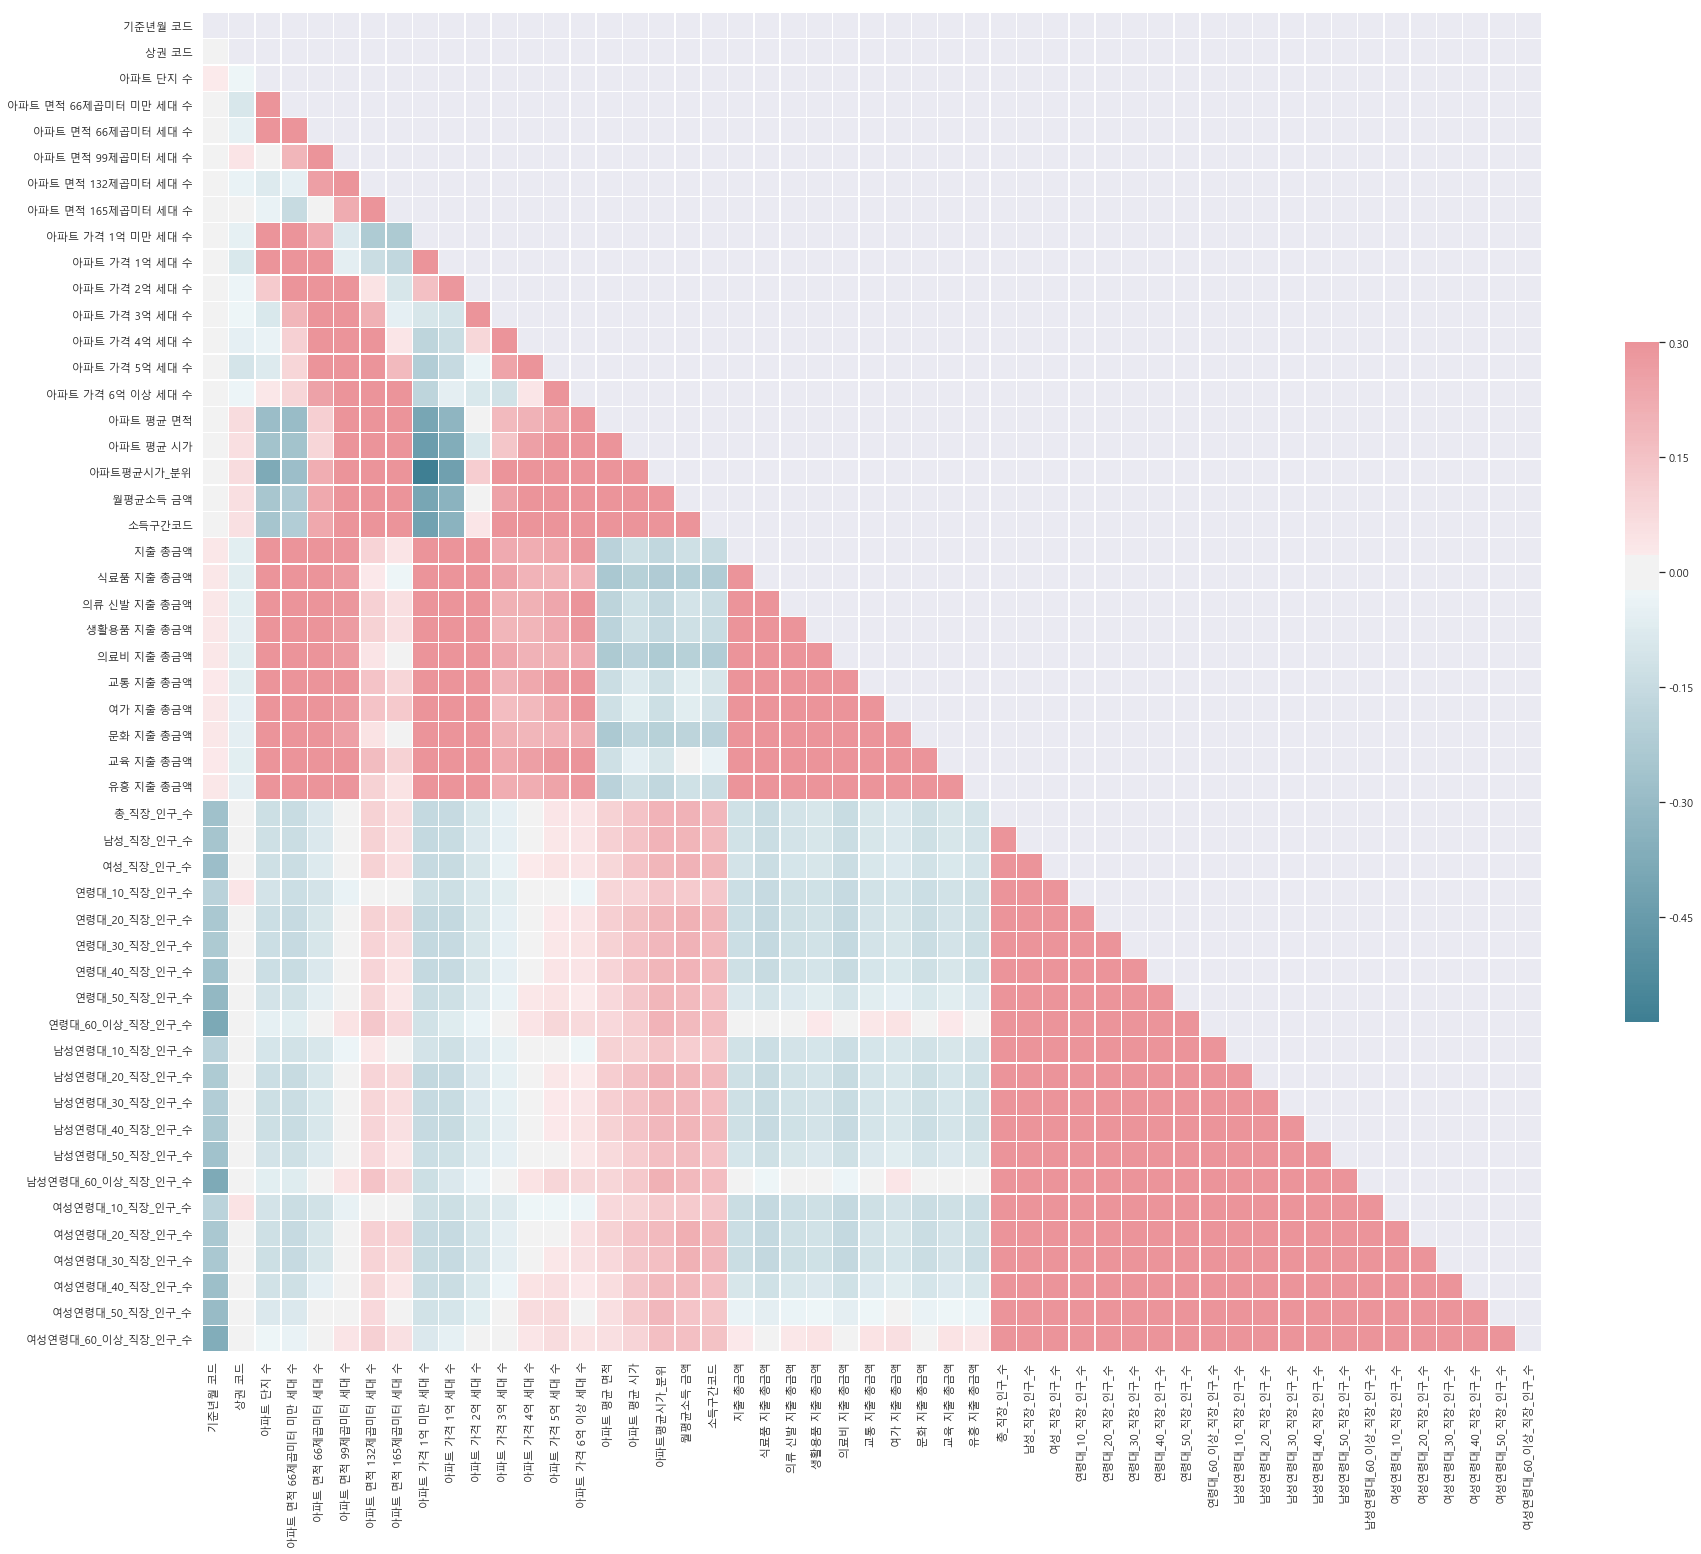

In [223]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 소득구간코드 별 아파트 평균 시가

In [221]:
df.소득구간코드.unique()

array([7, 6, 8, 9, 5, 1], dtype=int64)

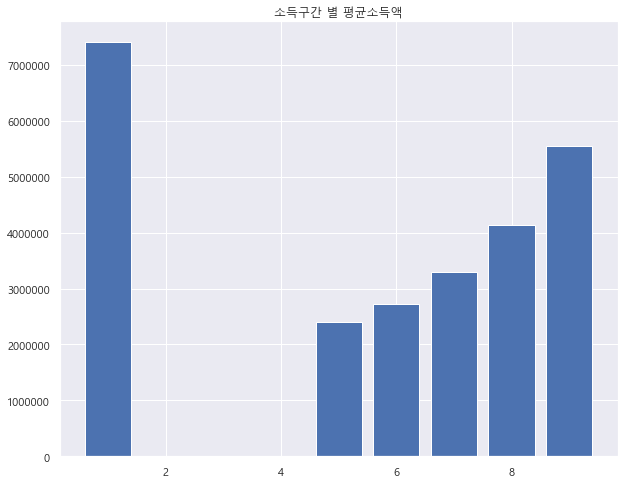

In [186]:
df.pivot_table(index=['아파트평균시가_분위', '소득구간코드'], values='월평균소득 금액', aggfunc='mean')
df.소득구간코드.unique()
소득구간별평균소득=df.pivot_table(index=['소득구간코드'], values='월평균소득 금액', aggfunc='mean')

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
plt.bar(소득구간별평균소득.index, 소득구간별평균소득['월평균소득 금액'])
plt.title('소득구간 별 평균소득액')
plt.show()

### 위의 내용을 근거로 소득소비구간의 1을 10으로 변경

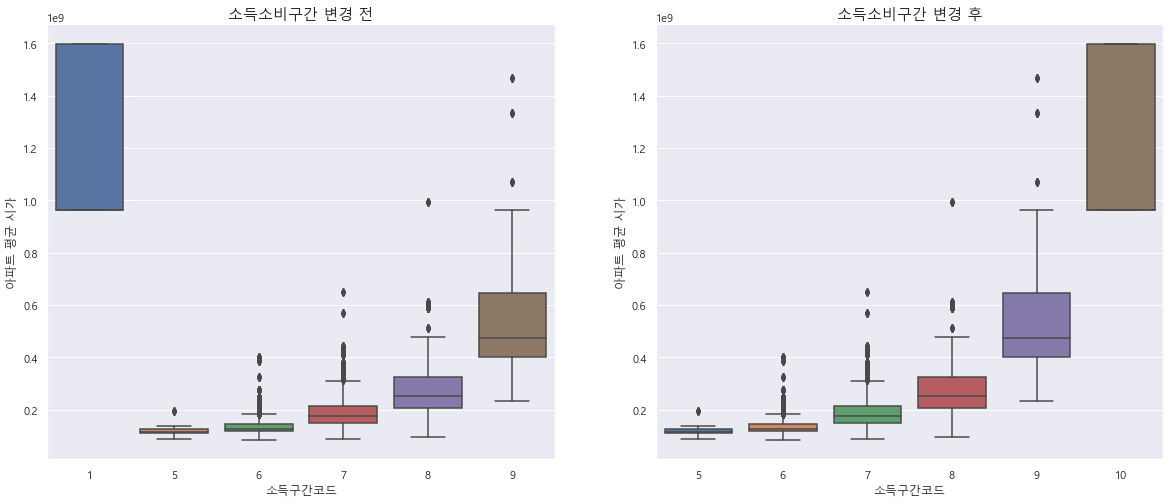

In [187]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'

plt.subplot(1,2,1)
sns.boxplot(data=df, x='소득구간코드', y='아파트 평균 시가').set_title('소득소비구간 변경 전',fontsize=15)
df.소득구간코드.replace({1:10}, inplace=True)
#plt.title("소득소비구간 변경 전")
plt.subplot(1,2,2)
sns.boxplot(data=df, x='소득구간코드', y='아파트 평균 시가').set_title('소득소비구간 변경 후',fontsize=15)
#plt.title("소득소비구간 변경 후")
plt.show()
# 소득소비구간 1->10


## 참고) 지출액을 보는 것의 무의미함
### - 월평균소득액: 건강보험료 납부액 기준 해당 지역에 거주하는 경제활동인구의 소득
### - 지출액: 카드결제금액, 그 지역에서 소비한 지출 총 내역

In [188]:
소득구간별지출 = df.pivot_table(index='소득구간코드', values=['지출 총금액', '식료품 지출 총금액',
       '의류 신발 지출 총금액', '생활용품 지출 총금액', '의료비 지출 총금액', '교통 지출 총금액', '여가 지출 총금액',
       '문화 지출 총금액', '교육 지출 총금액', '유흥 지출 총금액'], aggfunc='mean')

In [189]:
def draw_category(category):
    plt.figure(figsize=(15,6))
    plt.suptitle(category+'과 소득구간\n',fontsize=20)
    sns.set_color_codes("pastel")
    sns.barplot(x=소득구간별지출.index, y=소득구간별지출[category], data=소득구간별지출,
            label="Total", color="b")
    
categories = 소득구간별지출.columns[:].tolist()
interact(draw_category, category = categories)

interactive(children=(Dropdown(description='category', options=('교육 지출 총금액', '교통 지출 총금액', '문화 지출 총금액', '생활용품 지…

<function __main__.draw_category(category)>

## 소득분위별 지출내역 비중

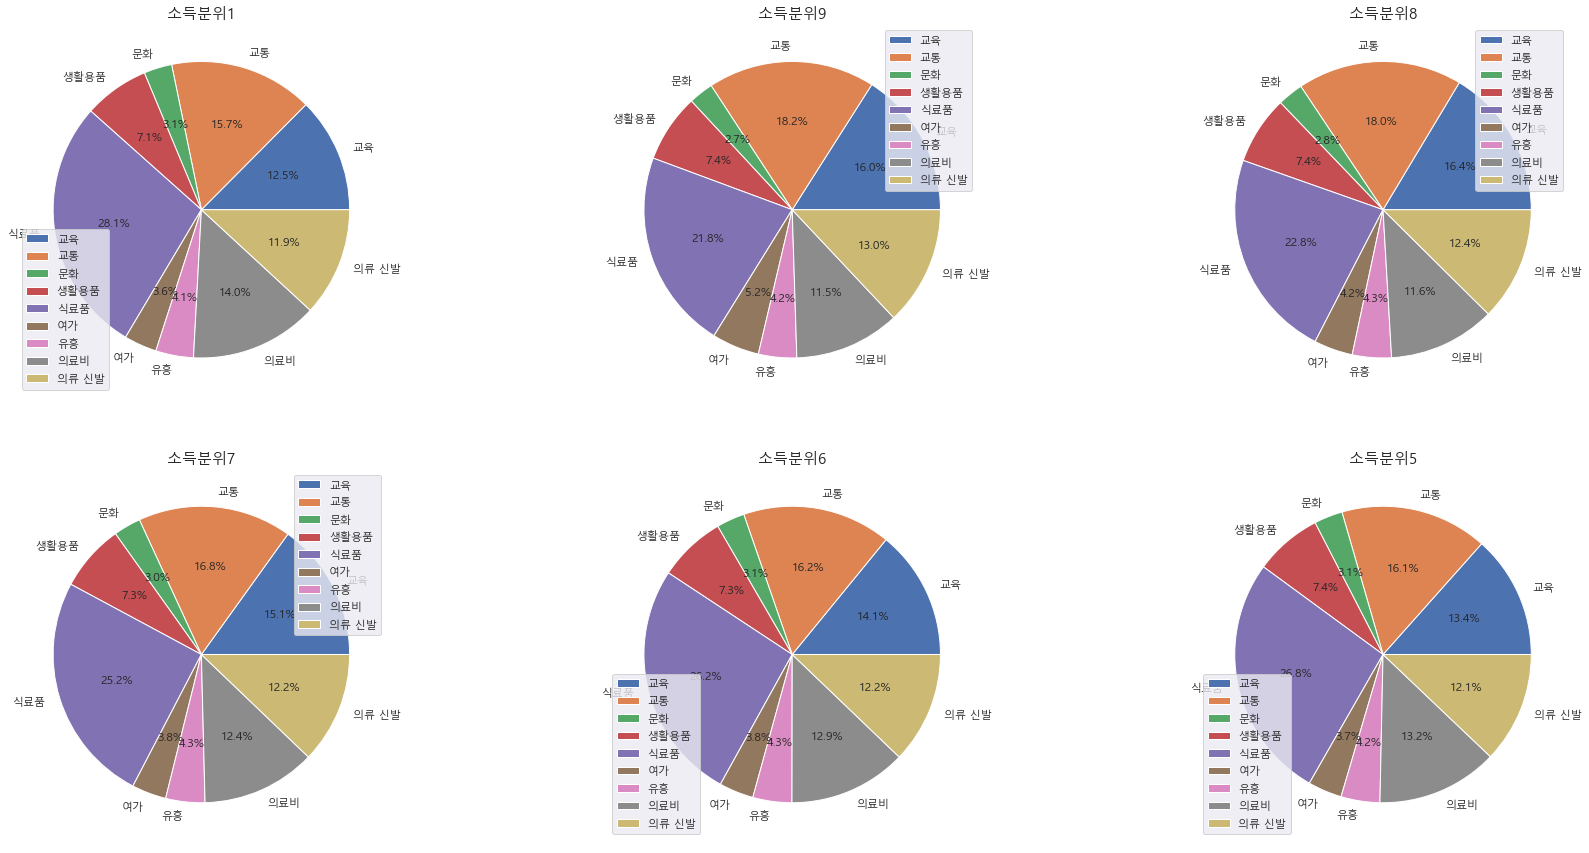

In [190]:
plt.figure(figsize=(30,15))
category=['교육', '교통', '문화', '생활용품', '식료품', '여가', '유흥', '의료비', '의류 신발']
plt.subplot(2,3,1)
plt.pie(소득구간별지출.iloc[0][:9], labels=category,autopct='%0.1f%%')
plt.legend(category)
plt.title('소득분위1', fontsize=15)

plt.subplot(2,3,2)
plt.pie(소득구간별지출.iloc[5][:9], labels=category,autopct='%0.1f%%')
plt.legend(category)
plt.title('소득분위9', fontsize=15)

plt.subplot(2,3,3)
plt.pie(소득구간별지출.iloc[4][:9], labels=category,autopct='%0.1f%%')
plt.legend(category)
plt.title('소득분위8', fontsize=15)

plt.subplot(2,3,4)
plt.pie(소득구간별지출.iloc[3][:9], labels=category,autopct='%0.1f%%')
plt.legend(category)
plt.title('소득분위7', fontsize=15)

plt.subplot(2,3,5)
plt.pie(소득구간별지출.iloc[2][:9], labels=category,autopct='%0.1f%%')
plt.legend(category)
plt.title('소득분위6', fontsize=15)

plt.subplot(2,3,6)
plt.pie(소득구간별지출.iloc[1][:9], labels=category,autopct='%0.1f%%')
plt.legend(category)
plt.title('소득분위5', fontsize=15)

plt.show()

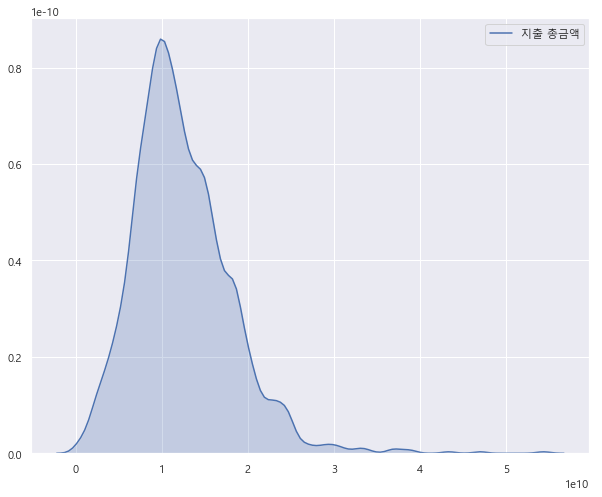

In [191]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['지출 총금액'], shade=True)
plt.show()

## 아파트 가격 분위 별 소득 및 지출

Text(0.5, 1.0, '아파트 가격 분위 별 지출 총금액')

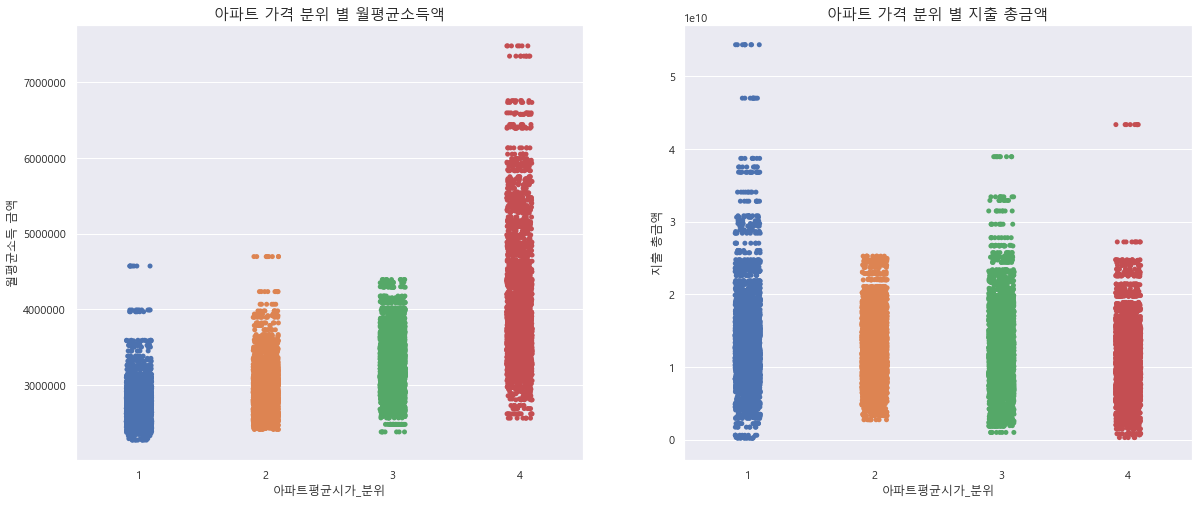

In [192]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.stripplot(x="아파트평균시가_분위", y="월평균소득 금액", data=df).set_title("아파트 가격 분위 별 월평균소득액", fontsize=15)
plt.subplot(1,2,2)
sns.stripplot(x="아파트평균시가_분위", y="지출 총금액", data=df).set_title("아파트 가격 분위 별 지출 총금액", fontsize=15)

## 아파트 가격 분위 별 월평균소득 및 단지 수

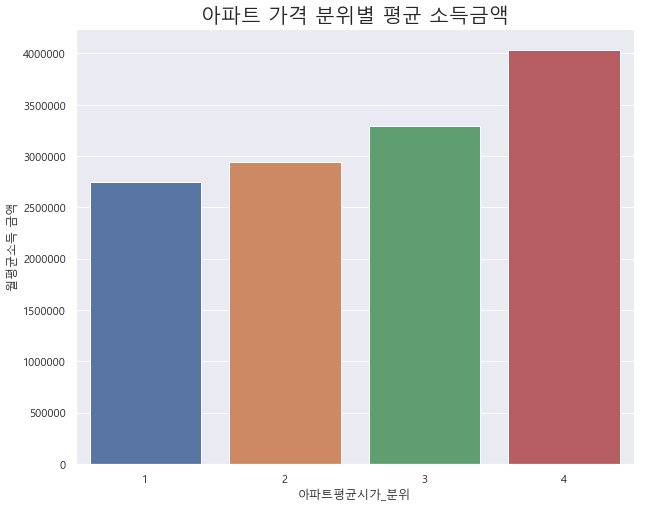

In [193]:
분위별평균소득=df.pivot_table(index='아파트평균시가_분위', values='월평균소득 금액', aggfunc='mean')

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
sns.barplot(분위별평균소득.index, 분위별평균소득['월평균소득 금액'])
#ax.set_xticks([1,2,3,4])

plt.title("아파트 가격 분위별 평균 소득금액", fontsize=20)
plt.show()

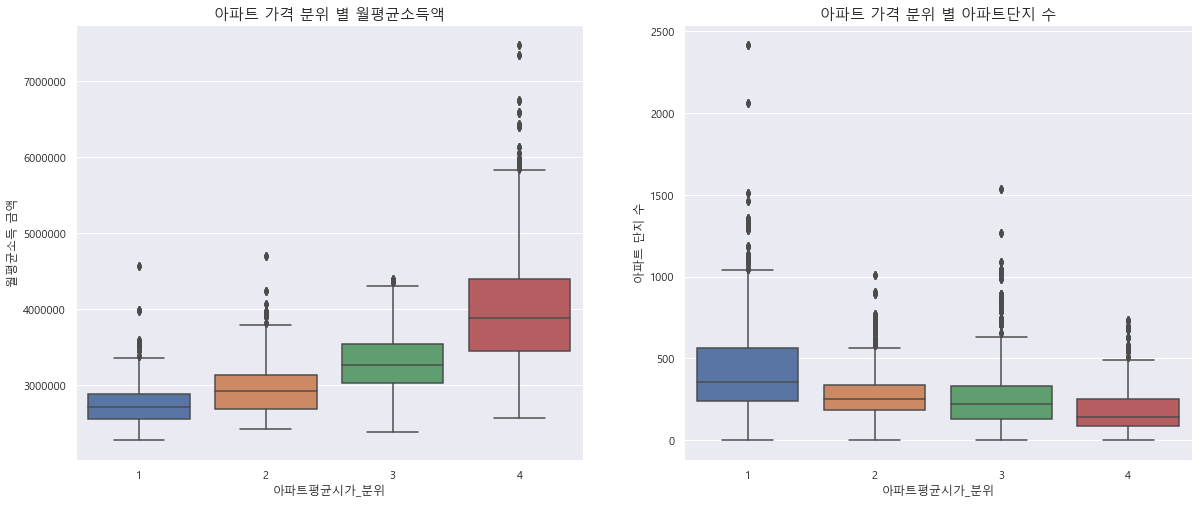

In [194]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='아파트평균시가_분위', y='월평균소득 금액').set_title("아파트 가격 분위 별 월평균소득액", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='아파트평균시가_분위', y='아파트 단지 수').set_title("아파트 가격 분위 별 아파트단지 수", fontsize=15)
plt.show()

# 아파트 가격 분위별 면적

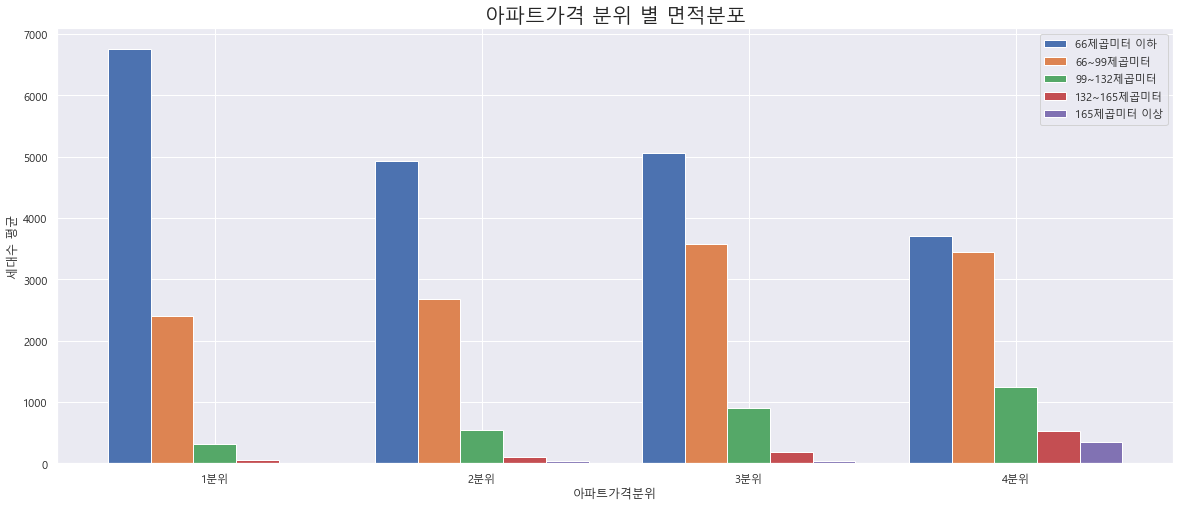

In [195]:

t면적66미만 = df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 66제곱미터 미만 세대 수', aggfunc='mean')
t면적66=df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 66제곱미터 세대 수', aggfunc='mean')
t면적99 = df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 99제곱미터 세대 수', aggfunc='mean')
t면적132=df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 132제곱미터 세대 수', aggfunc='mean')
t면적165= df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 165제곱미터 세대 수', aggfunc='mean')



def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
면적66미만 = create_x(5, 0.8, 1, 4)
면적66 = create_x(5, 0.8, 2, 4)
면적99 = create_x(5, 0.8, 3, 4)
면적132 = create_x(5, 0.8, 4, 4)
면적165 = create_x(5, 0.8, 5, 4)

plt.figure(figsize=(20,8))
ax = plt.subplot()
plt.bar(면적66미만, t면적66미만['아파트 면적 66제곱미터 미만 세대 수'])
plt.bar(면적66, t면적66['아파트 면적 66제곱미터 세대 수'])
plt.bar(면적99, t면적99['아파트 면적 99제곱미터 세대 수'])
plt.bar(면적132, t면적132['아파트 면적 132제곱미터 세대 수'])
plt.bar(면적165, t면적165['아파트 면적 165제곱미터 세대 수'])
middle_x = [ (a + b+c+d+e) / 5.0 for a, b,c,d,e in zip(면적66미만, 면적66, 면적99, 면적132, 면적165)]
ax.set_xticks(middle_x)
ax.set_xticklabels(['1분위', '2분위', '3분위', '4분위'])
plt.legend(['66제곱미터 이하', '66~99제곱미터', '99~132제곱미터', '132~165제곱미터', '165제곱미터 이상'])
plt.title('아파트가격 분위 별 면적분포', fontsize=20)
plt.xlabel('아파트가격분위')
plt.ylabel('세대수 평균')
plt.show()



## - 비교적 적은 면적

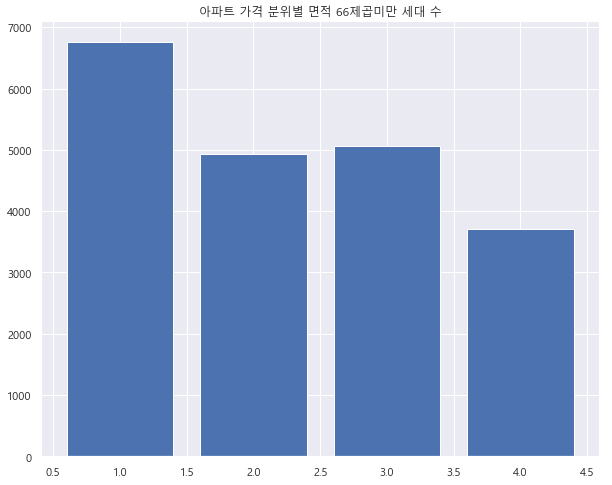

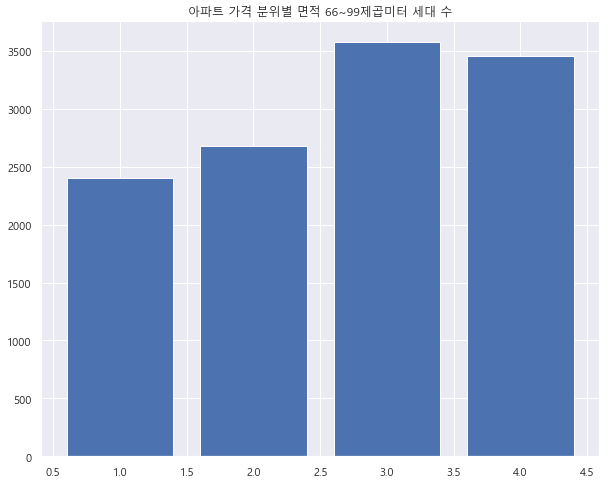

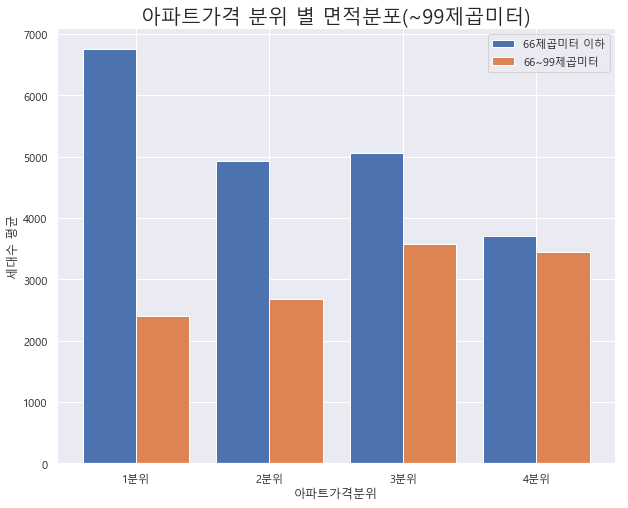

In [217]:
면적66미만 =df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 66제곱미터 미만 세대 수', aggfunc='mean')

plt.figure(figsize=(10,8))

plt.bar(면적66미만.index, 면적66미만['아파트 면적 66제곱미터 미만 세대 수'])
plt.title('아파트 가격 분위별 면적 66제곱미만 세대 수')
plt.show()

면적66_99=df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 66제곱미터 세대 수', aggfunc='mean')
plt.figure(figsize=(10,8))
plt.bar(면적66_99.index, 면적66_99['아파트 면적 66제곱미터 세대 수'])
plt.title('아파트 가격 분위별 면적 66~99제곱미터 세대 수')
plt.show()

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
면적66 = create_x(2, 0.8, 1, 4)
면적99 = create_x(2, 0.8, 2, 4)
plt.figure(figsize=(10,8))

ax = plt.subplot()
plt.bar(면적66, 면적66미만['아파트 면적 66제곱미터 미만 세대 수'])
plt.bar(면적99, 면적66_99['아파트 면적 66제곱미터 세대 수'])
middle_x = [ (a + b) / 2.0 for a, b in zip(면적66, 면적99)]
ax.set_xticks(middle_x)
ax.set_xticklabels(['1분위', '2분위', '3분위', '4분위'])
plt.legend(['66제곱미터 이하', '66~99제곱미터'])
plt.title('아파트가격 분위 별 면적분포(~99제곱미터)', fontsize=20)
plt.xlabel('아파트가격분위')
plt.ylabel('세대수 평균')
plt.show()

## - 넓은 면적

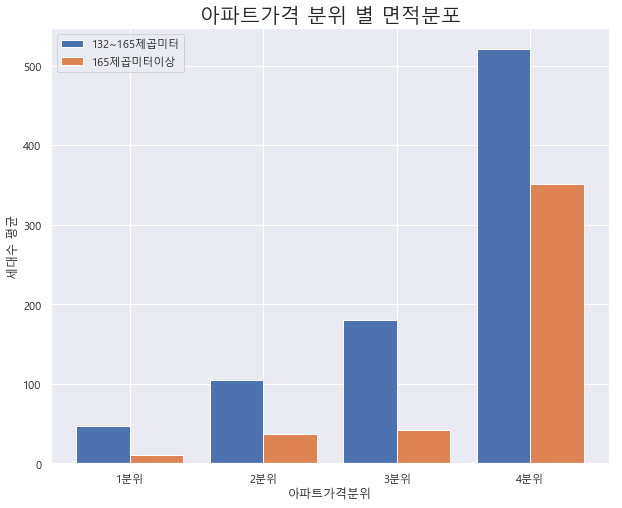

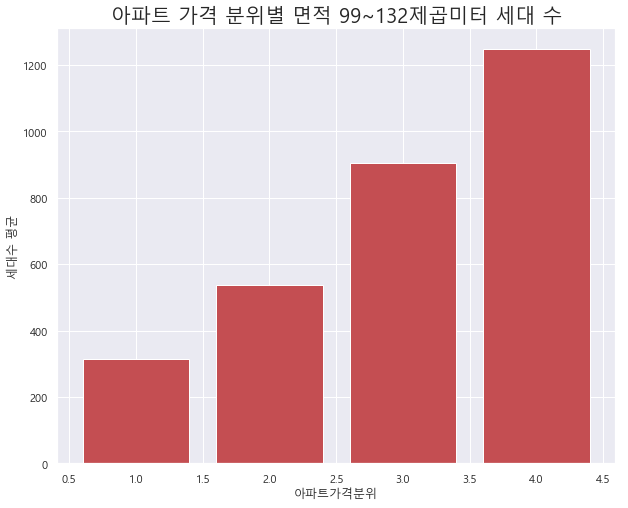

In [197]:
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
면적132 = create_x(2, 0.8, 1, 4)
면적165 = create_x(2, 0.8, 2, 4)

plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(면적132, t면적132['아파트 면적 132제곱미터 세대 수'])
plt.bar(면적165, t면적165['아파트 면적 165제곱미터 세대 수'])
middle_x = [ (a + b) / 2.0 for a, b in zip(면적132, 면적165)]
ax.set_xticks(middle_x)
ax.set_xticklabels(['1분위', '2분위', '3분위', '4분위'])
plt.legend(['132~165제곱미터', '165제곱미터이상'])
plt.title('아파트가격 분위 별 면적분포', fontsize=20)
plt.xlabel('아파트가격분위')
plt.ylabel('세대수 평균')
plt.show()



면적99 = df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 99제곱미터 세대 수', aggfunc='mean')

plt.figure(figsize=(10,8))
plt.bar(면적99.index, 면적99['아파트 면적 99제곱미터 세대 수'], color='r')
plt.xlabel('아파트가격분위')
plt.ylabel('세대수 평균')
plt.title('아파트 가격 분위별 면적 99~132제곱미터 세대 수', fontsize=20)
plt.show()

면적132=df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 132제곱미터 세대 수', aggfunc='mean')

#df.pivot_table(index='아파트평균시가_분위', values='아파트 면적 165제곱미터 세대 수', aggfunc='mean')
# 165제곱미터 = 50평


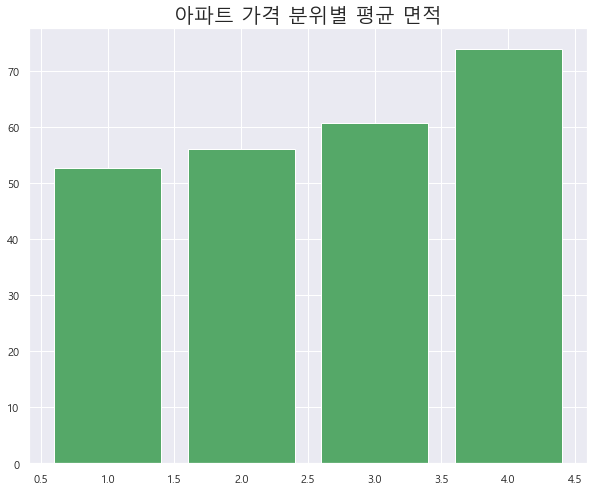

In [198]:
분위별평균면적 = df.pivot_table(index='아파트평균시가_분위', values='아파트 평균 면적', aggfunc='mean')

plt.figure(figsize=(10,8))
plt.bar(분위별평균면적.index, 분위별평균면적['아파트 평균 면적'], color='g')
plt.title('아파트 가격 분위별 평균 면적', fontsize=20)
plt.show()

# 소득 분위별 아파트 평균 면적 및 평균 시가

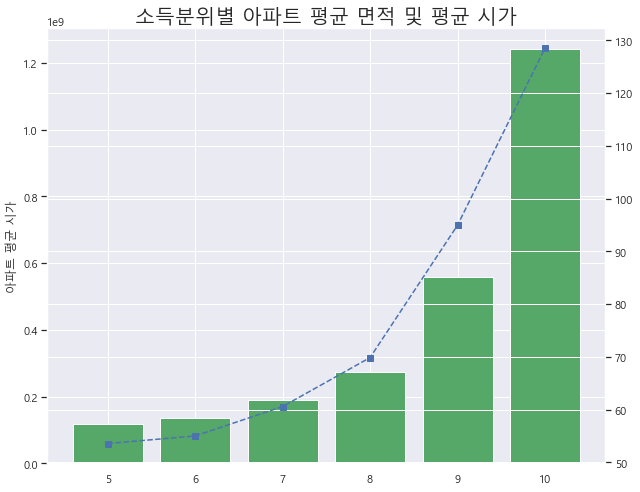

In [199]:
소득별아파트평균 = df.pivot_table(index='소득구간코드', values=['아파트 평균 면적', '아파트 평균 시가'],aggfunc='mean')

x = 소득별아파트평균.index
y1=소득별아파트평균['아파트 평균 면적']
y2=소득별아파트평균['아파트 평균 시가']
fig, ax1=plt.subplots(figsize=(10,8))
ax1.set_ylabel("아파트 평균 면적")
ax2=ax1.twinx()
ax1.bar(x, y2, color='g')
ax2.plot(x, y1, 'bs--')

ax1.set_ylabel("아파트 평균 시가")
ax2.set_xlabel("소득분위")
plt.title("소득분위별 아파트 평균 면적 및 평균 시가", fontsize=20)
plt.show()

# 아파트 가격 분위 별 총 직장인구

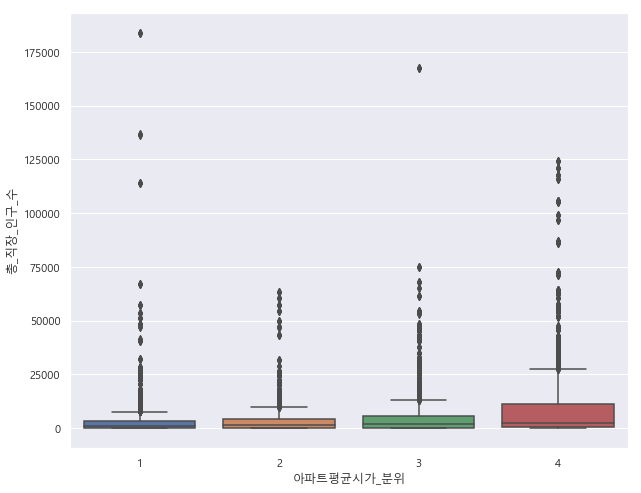

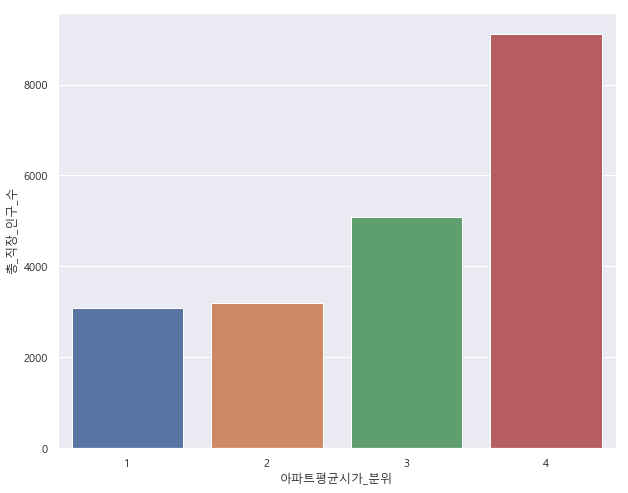

In [200]:
# 직장인구
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
sns.boxplot(data=df, x='아파트평균시가_분위', y='총_직장_인구_수')
plt.show()

아파트분위별총직장인구평균 = df.pivot_table(index='아파트평균시가_분위', values='총_직장_인구_수')

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
sns.barplot(data=아파트분위별총직장인구평균, x=아파트분위별총직장인구평균.index, y='총_직장_인구_수')
plt.show()


# 아파트 시가와의 상관관계
## - 아파트 시가 별 월 평균소득 금액

<Figure size 720x576 with 0 Axes>

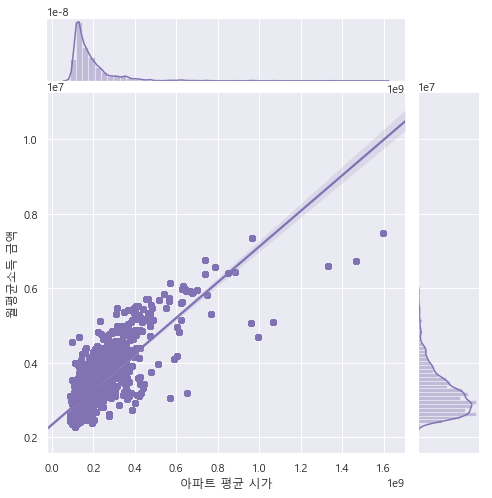

In [201]:

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
sns.jointplot(x="아파트 평균 시가", y="월평균소득 금액", data=df, kind="reg", color="m", height=7)

plt.show()

## - 아파트 시가 별 총 직장인구수

<Figure size 720x576 with 0 Axes>

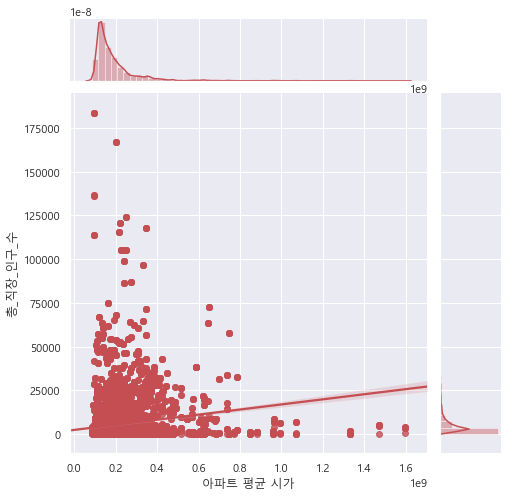

In [202]:

plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
sns.jointplot(x="아파트 평균 시가", y="총_직장_인구_수", data=df, kind="reg", color="r", height=7)
plt.show()


# 구별 아파트 평균 시가

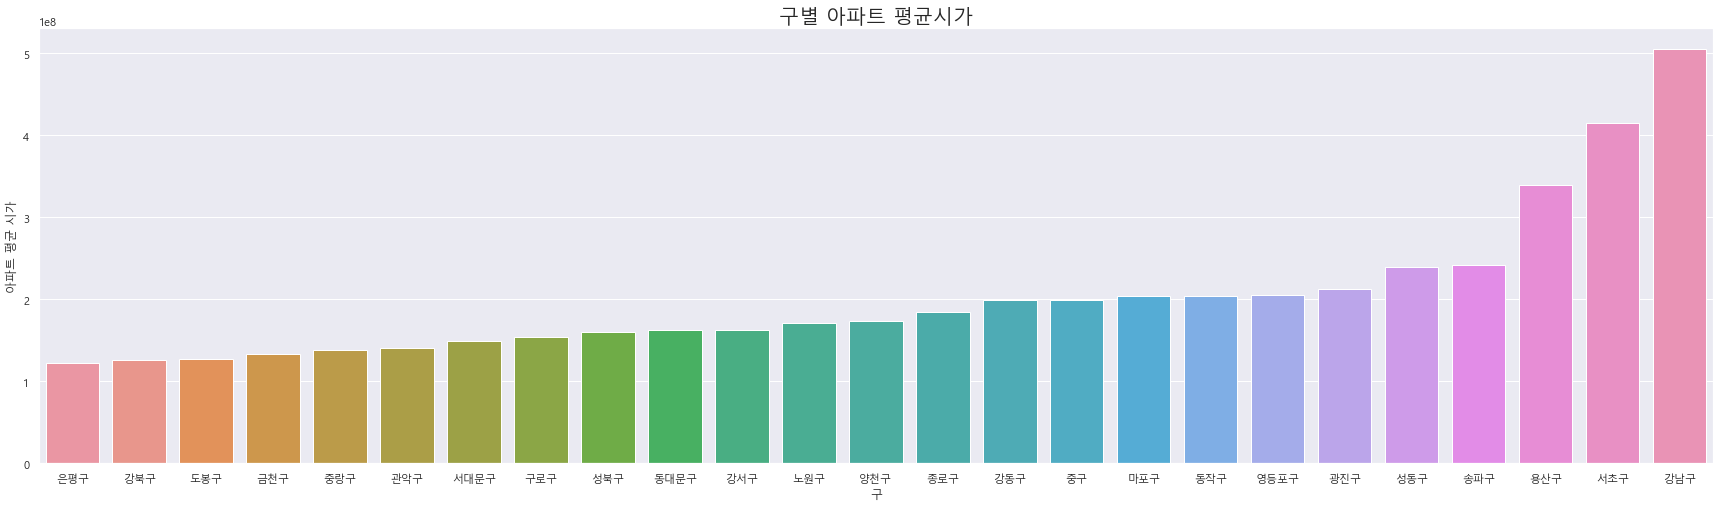

In [177]:
# 구별 아파트 평균시가

df_new = df[['아파트 평균 시가', '구', '월평균소득 금액']]
구별평균 = df_new.pivot_table(index='구', values=['아파트 평균 시가', '월평균소득 금액']).sort_values(by='아파트 평균 시가')
plt.figure(figsize=(30,8))
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
sns.barplot(data=구별평균, x=구별평균.index, y='아파트 평균 시가')
plt.title('구별 아파트 평균시가', fontsize=20)
plt.show()


In [35]:
유동인구2018 = pd.read_csv('./data/서울시상권데이터/유동인구2018최종_2.csv', engine='python', encoding='UTF-8')
집객시설2018 = pd.read_csv('./data/서울시상권데이터/집객시설2018최종.csv', engine='python', encoding='UTF-8')
pd.options.display.float_format = '{:.2f}'.format

In [37]:
집객시설2018 = 집객시설2018.fillna(0)
col = 집객시설2018.columns[3:-4].tolist()
col.append('아파트 평균 시가')
col.remove('공항_수')
col.remove('철도_역_수')
corr_df = 집객시설2018[col]

# 아파트 가격과 집객시설개수 상관관계 

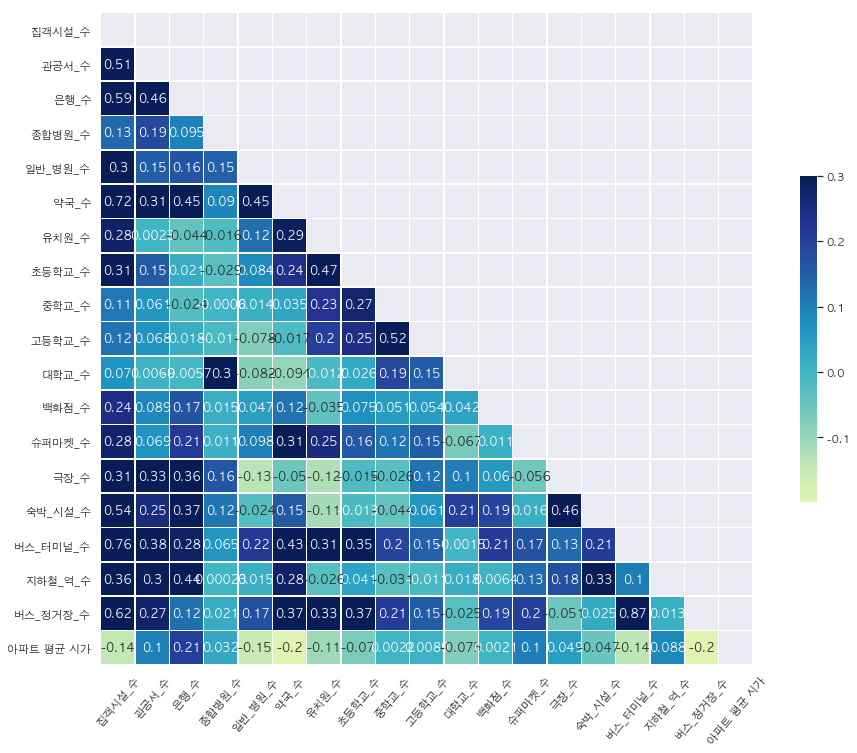

In [108]:
corr = corr_df.corr()
import numpy as np 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(17,12))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,cmap='YlGnBu',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, )
#g.set_xticklabels(rotation=30)
plt.xticks(rotation=50)
plt.show()

### 은행 수  

In [203]:
분위별집객시설 = 집객시설2018.pivot_table(index='아파트시가_분위',aggfunc='mean')


In [204]:
분위별집객시설

,고등학교_수,공항_수,관공서_수,극장_수,기준_년월_코드,대학교_수,백화점_수,버스_정거장_수,버스_터미널_수,상권_코드,...,약국_수,유치원_수,은행_수,일반_병원_수,종합병원_수,중학교_수,지하철_역_수,집객시설_수,철도_역_수,초등학교_수
아파트시가_분위,,,,,,,,,,,,,,,,,,,,,
1.00,0.60,0.00,5.03,0.81,201805,2.57,0.03,37.90,32.48,812.90,...,17.06,2.30,4.06,1.36,0.48,0.79,0.70,201.26,0.00,1.45
2.00,0.69,0.00,5.34,1.14,201805,2.48,0.02,36.34,32.75,869.69,...,15.89,2.34,4.62,1.31,0.26,0.83,0.89,203.40,0.00,1.56
3.00,0.78,0.00,5.56,2.31,201805,1.17,0.03,34.76,32.16,908.04,...,16.36,2.57,5.22,1.50,0.19,0.92,1.06,203.51,0.00,1.72
4.00,0.77,0.00,6.11,1.99,201805,1.01,0.01,30.22,28.74,898.53,...,13.06,1.99,6.88,0.79,0.28,0.83,1.26,179.96,0.00,1.41


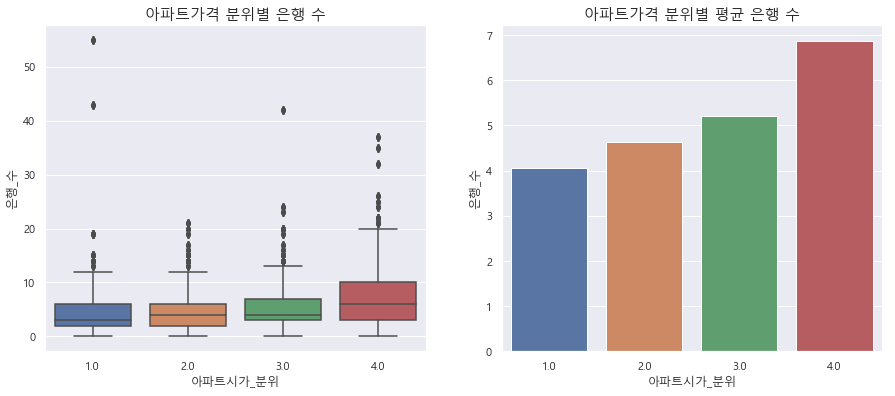

In [205]:
sns.set(style='darkgrid')
sns.set(font="Malgun Gothic")
mpl.rcParams['font.family']='Malgun Gothic'
#mpl.rcParams['axes.unicode_minus'] = False   
#mpl.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(집객시설2018['아파트시가_분위'],집객시설2018['은행_수']).set_title('아파트가격 분위별 은행 수',fontsize=15)
plt.subplot(122)
sns.barplot(분위별집객시설.index,분위별집객시설['은행_수']).set_title('아파트가격 분위별 평균 은행 수',fontsize=15)
plt.show()

### 덧) 실제로 어느 지역에 은행이 많을까?  

In [41]:
집객시설2018.pivot_table(index='구',aggfunc='mean',values='은행_수').sort_values(by='은행_수',ascending=False).head(10)

,은행_수
구,
중구,13.02
강남구,9.95
서초구,9.36
종로구,7.75
마포구,7.28
송파구,7.12
강동구,6.22
용산구,5.34
금천구,5.26


### 약국 수 

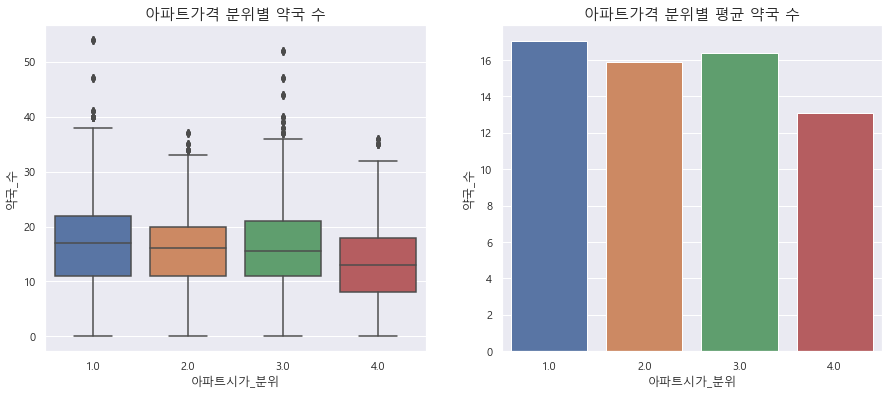

In [206]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(집객시설2018['아파트시가_분위'],집객시설2018['약국_수']).set_title('아파트가격 분위별 약국 수',fontsize=15)
plt.subplot(122)
sns.barplot(분위별집객시설.index,분위별집객시설['약국_수']).set_title('아파트가격 분위별 평균 약국 수',fontsize=15)
plt.show()

### 상관계수는 낮지만 관련있는 기타 요인들 확인 (지하철) 

In [207]:
def draw_facility(facility):
    plt.figure(figsize=(15,6))
    plt.suptitle('아파트 가격과 '+facility+' 간의 관계 분석\n',fontsize=20)
    plt.subplot(121)
    sns.boxplot(집객시설2018['아파트시가_분위'],집객시설2018[facility])#.set_title('아파트가격 분위별 '+facility,fontsize=15)
    plt.subplot(122)
    sns.barplot(분위별집객시설.index,분위별집객시설[facility])#.set_title('아파트가격 분위별 평균 '+facility,fontsize=15)
    plt.show()
    
facilities = 집객시설2018.columns[3:-4].tolist()
interact(draw_facility, facility = facilities)


interactive(children=(Dropdown(description='facility', options=('집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수'…

<function __main__.draw_facility(facility)>

# 아파트 가격과 유동인구 관계 

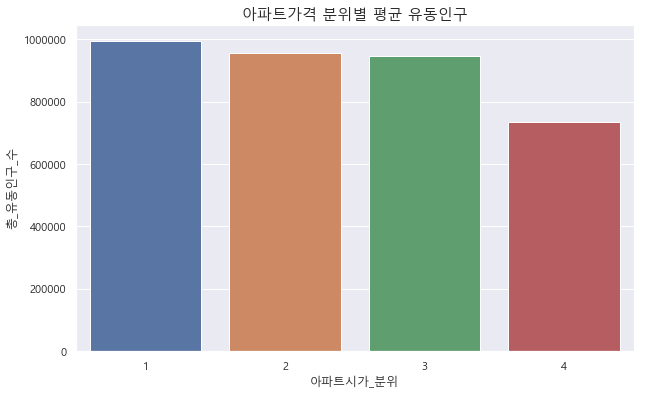

In [208]:
분위별유동인구 = 유동인구2018.pivot_table(index='아파트시가_분위',aggfunc='mean')

plt.figure(figsize=(10,6))

sns.barplot(분위별유동인구.index,분위별유동인구['총_유동인구_수']).set_title('아파트가격 분위별 평균 유동인구',fontsize=15)
plt.show()

In [209]:
분위별요일유동인구 = 분위별유동인구[['월요일_유동인구_수','화요일_유동인구_수','수요일_유동인구_수','목요일_유동인구_수','금요일_유동인구_수'
                  ,'토요일_유동인구_수','일요일_유동인구_수']]

In [210]:
'아파트가격 1분위'.split(' ')[1].split('분위')

['1', '']

In [211]:
분위별요일유동인구.columns=[['월요일','화요일','수요일','목요일','금요일','토요일','일요일']]

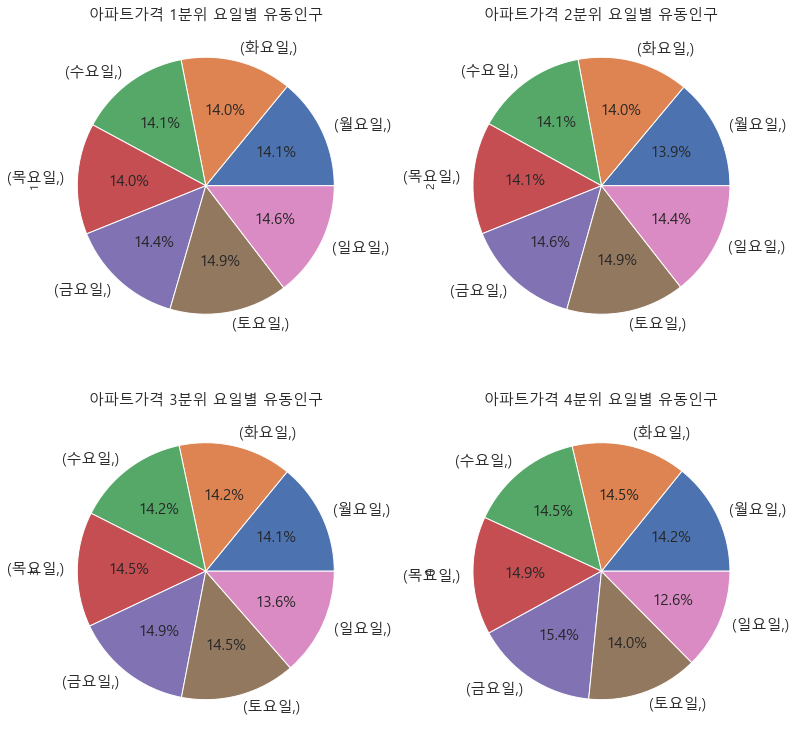

In [212]:
plt.figure(figsize=(13,13))
plt.subplot(221)
분위별요일유동인구.loc[1].plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('아파트가격 1분위 요일별 유동인구',fontsize=15)
plt.subplot(222)
분위별요일유동인구.loc[2].plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('아파트가격 2분위 요일별 유동인구',fontsize=15)
plt.subplot(223)
분위별요일유동인구.loc[3].plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('아파트가격 3분위 요일별 유동인구',fontsize=15)
plt.subplot(224)
분위별요일유동인구.loc[4].plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('아파트가격 4분위 요일별 유동인구',fontsize=15)
plt.show()

In [213]:
def draw(rank):
    
    rank = rank.split(' ')[1]
    rank = rank.split('분위')[0]
    rank=int(rank)
    plt.figure(figsize=(10,8))
    분위별요일유동인구.loc[rank].plot(kind='pie',autopct='%1.1f%%')
    plt.title(str(rank)+'분위 유동인구 요일별 비중', fontsize=15)
    plt.show()


In [214]:
rank_list = ['아파트가격 1분위','아파트가격 2분위','아파트가격 3분위','아파트가격 4분위']
interact(draw, rank = rank_list)

interactive(children=(Dropdown(description='rank', options=('아파트가격 1분위', '아파트가격 2분위', '아파트가격 3분위', '아파트가격 4분위'…

<function __main__.draw(rank)>